### Задание 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.preprocessing import StandardScaler

In [90]:
boston = load_boston()
data = boston["data"]
target = boston["target"]
feature_names = boston["feature_names"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state = 100)

In [115]:
def evaluate_preds(true_val, pred_val):
    print("R2:\t" + str(round(r2(true_val, pred_val), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_val, pred_val)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_val, pred_val), 3))
         )
    
    check_test = pd.DataFrame({
    "y_test": true_val["price"],
    "y_pred": pred_val.flatten(),
    })
    
    plt.figure(figsize=(8, 8))
    
    sns.scatterplot(x=check_test['y_pred'], y=check_test['y_test'])
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')
    
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    plt.title('True vs Predicted values')

    plt.show

R2:	0.706
RMSE:	5.459
MSE:	29.799


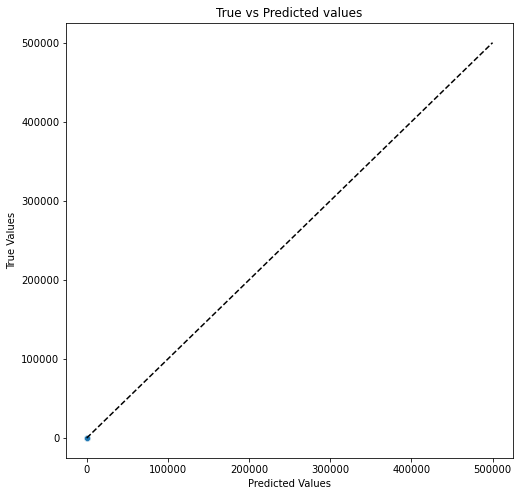

In [116]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

evaluate_preds(y_test, y_pred)

### Задание 2

In [93]:
from sklearn.ensemble import RandomForestRegressor

R2:	0.805
RMSE:	4.441
MSE:	19.722


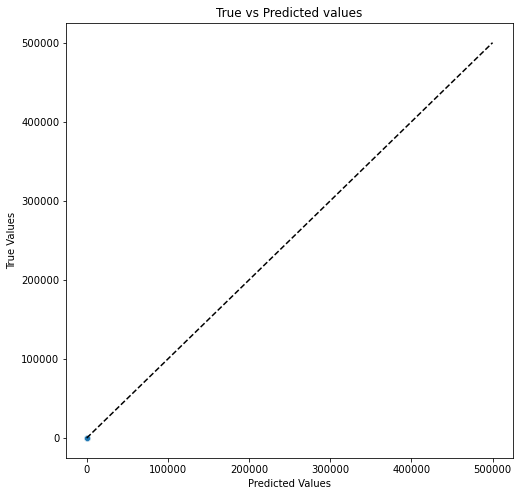

In [117]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=100)
model.fit(X_train, y_train.values[:, 0])
y_pred_forest = model.predict(X_test)

evaluate_preds(y_test, y_pred_forest)

### Задание 3

In [103]:
fi = model.feature_importances_

sum_fi = 0
for el in fi:
    sum_fi =+ el

print ('Сумма показателей важности =', sum_fi)

Сумма показателей важности = 0.35504037155868146


In [104]:
fi_ = sorted(fi)

print('2 наиболее важных признака:')
print(fi_[len(fi_)-1], '\t', fi_[len(fi_)-2])

2 наиболее важных признака:
0.47924351905156753 	 0.35504037155868146


### Задание 4